# Logistic Regression

## What we are going to learn
+ Logistic Regression
+ Sigmoid function
+ Gradient Descent
+ Scikit-learn

## Sigmoid function

+ $\sigma(z)= \frac{1}{1+exp(-z)}$ $\Longrightarrow$ $\sigma(w^Tx) = \frac{1}{1+exp^(-w^Tx)}$
+ $\sigma(z)$ is called sigmoid function or logistic function
+ always generates a value between 0 and 1

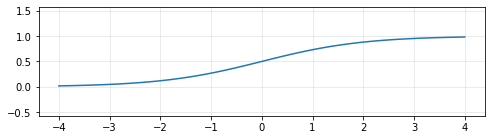

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

z = np.linspace(-4,4,100)
s = 1/(1 + np.exp(-z))

plt.figure(figsize=(8,2))
plt.plot(z, s)
plt.xlim([-4, 4])
plt.axis('equal')
plt.grid(alpha = 0.3)
plt.show()

**benefit of the sigmoid function**
1. Monotonic
2. Continuous and differentiable $\rightarrow$ gradient descent
3. Probability $\rightarrow$ can be considered as probability

+ Probability that the label is $+1$ <br>
$P(y=+1 | x;w) = \frac{1}{1+exp(-w^Tx)}$ $ = f(x;w)$
+ Probability that the label is $0$ <br>
$P(y=0 | x;w) = 1-P(y=+1 | x,w)$ $=1-f(x;w)$

Then,<br>
$P(y|x;w) = (f(x;w))^y(1-f(x;w))^{1-y}$ <br>

For $D = \{x_i, y_i\}^{N}_{i=1}$ <br><br>
the likelihood function would be <br><br>
$L_1(w)=$$\Pi^{N}_{i=1}P(y_{i}|x_{i};w)$$ = \Pi^{N}_{i=1}$$(f(x_i;w))^{y_i}$$(1-f(x_i;w))^{1-y_i}$

**log likelihood** <br>
$logL_1(w)$ $=\Sigma^{N}_{i=1}y_ilogf(x_i) + (1-y_i)log(1-f(x_i))$ <br><br>
take -(minus) <br>
we could get the **cross-entropy** <br>
$L_2(w) = $$\Sigma^{N}_{i=1}-y_ilogf(x_i) - (1-y_i)log(1-f(x_i))$

+ The logistic regression problem is (convex) optimization problem<br>
$w^* = \underset{w}{\operatorname{argmax}}L_2(w)$

## Gradient Descent

In [11]:
#설명쓰기

In [26]:
## data generation

datanum1 = 50
datanum2 = 50
mean1 = np.array([0,0])
mean2 = np.array([1, -.5])
cov1 = np.array([[.1, .02],[.02, .1]])
cov2 = np.array([[.1, .02],[.02, .1]])
data1 = np.random.multivariate_normal(mean1, cov1, datanum1)
data2 = np.random.multivariate_normal(mean2, cov2, datanum2)
tstdatanum1 = 100
tstdatanum2 = 100
tstdata1 = np.random.multivariate_normal(mean1, cov1, tstdatanum1)
tstdata2 = np.random.multivariate_normal(mean2, cov2, tstdatanum2)
y = np.empty([datanum1+datanum2,1])
y[:datanum1] = 1
y[datanum1:datanum1+datanum2] = 0

dataset = np.vstack((data1, data2))

X = np.hstack([np.ones([datanum1+datanum2, 1]), dataset])
X.shape

(100, 3)

(-0.8363039583455127,
 1.6801366269399893,
 -1.1793246685936274,
 1.044491143594521)

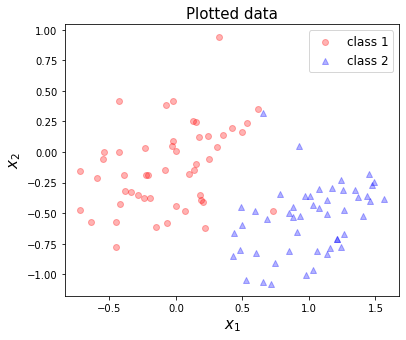

In [27]:
# draw data
fig, ax = plt.subplots(figsize=(6,5))
ax.scatter(data1[:,0], data1[:,1], color='red', label='class 1', alpha =.3)
ax.scatter(data2[:,0], data2[:,1], color='blue', marker='^', label='class 2', alpha =.3)

ax.set_title('Plotted data', fontsize = 15)
ax.legend()
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
[x1min, x1max, x2min, x2max] = ax.axis()
ax.axis([x1min, x1max, x2min, x2max])
#ax.grid()

In [28]:
#w = np.zeros([3,1])
w = np.array([[-6],[2],[1]])
w = np.asmatrix(w)
X = np.asmatrix(X)

In [29]:
def f(x,w):
    return 1/(1+np.exp(-x*w))

In [30]:
def get_loss(y, f):
    loss_val = np.sum(y*np.log(f) + (1 - y)*np.log(1 - f))
    return loss_val

In [31]:
alpha = 0.0001

obj_history = []

for i in range(10000):   
    df = X.T*(f(X,w)-y)
    w = w - alpha*df
    obj_history.append(get_loss(y.T, f(X,w)))

print(w)

[[ 2.62203122]
 [-4.26778442]
 [ 2.21033659]]


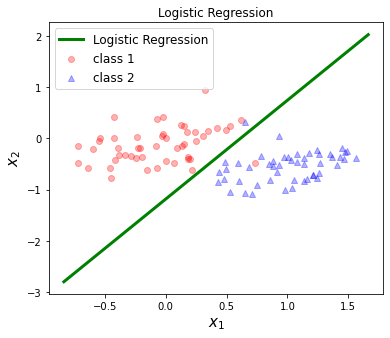

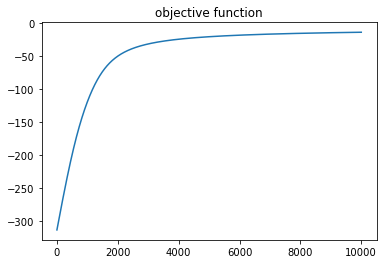

In [32]:
px = np.arange(x1min, x1max, 0.1).reshape(-1,1)
py = - w[1,0]/w[2,0]*px - w[0,0]/w[2,0]
fig, ax = plt.subplots(figsize=(6,5))
ax.scatter(data1[:,0], data1[:,1], color='red', label='class 1', alpha =.3)
ax.scatter(data2[:,0], data2[:,1], color='blue', marker='^', label='class 2', alpha =.3)
plt.plot(px, py, 'g', linewidth = 3, label = 'Logistic Regression')
plt.title('Logistic Regression')
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.legend(fontsize = 12)

fig2, ax2 = plt.subplots()
ax2.plot(obj_history)
ax2.set_title("objective function")

plt.show()

## Scikit learn

In [33]:
X = X[:,1:3]

from sklearn import linear_model

clf = linear_model.LogisticRegression(solver='lbfgs')
clf.fit(X,np.ravel(y))

LogisticRegression()

In [34]:
clf.coef_

array([[-3.61368214,  1.91856829]])

In [35]:
clf.intercept_

array([2.37871353])

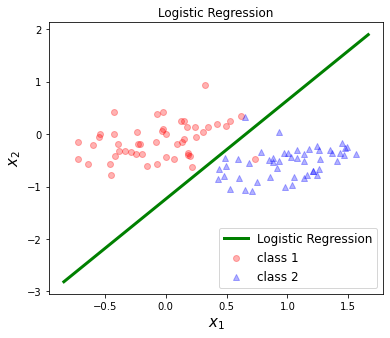

In [36]:
w0 = clf.intercept_[0]
w1 = clf.coef_[0,0]
w2 = clf.coef_[0,1]

px = np.arange(x1min, x1max, 0.1).reshape(-1, 1)
py = - w1/w2*px - w0/w2

fig, ax = plt.subplots(figsize=(6,5))
ax.scatter(data1[:,0], data1[:,1], color='red', label='class 1', alpha =.3)
ax.scatter(data2[:,0], data2[:,1], color='blue', marker='^', label='class 2', alpha =.3)
plt.plot(px, py, 'g', linewidth = 3, label = 'Logistic Regression')
plt.title('Logistic Regression')
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.legend(fontsize = 12)
plt.show()

## Keras

In [50]:
import tensorflow as tf

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow.keras as keras

x_train = np.concatenate((data1, data2), axis=0)
y_train = np.concatenate((np.ones(datanum1), np.zeros(datanum2)))  # label of class 1: 1, label of class 2: 0
x_test = np.concatenate((tstdata1, tstdata2), axis=0)
y_test = np.concatenate((np.ones(tstdatanum1), np.zeros(tstdatanum2)))

In [51]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow.keras as keras

In [52]:
model = Sequential()
model.add(Dense(units=1, activation='sigmoid', input_shape=(2,), kernel_regularizer=keras.regularizers.l2(0.1)))   # caution: not 'softmax' or 'relu'
model.summary()

model.compile(loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [53]:
history = model.fit(x_train, y_train,
                    epochs=500,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/500
4/4 [==============================] - 1s 118ms/step - loss: 0.6887 - accuracy: 0.7000 - val_loss: 0.6749 - val_accuracy: 0.7400
Epoch 2/500
4/4 [==============================] - 0s 17ms/step - loss: 0.6862 - accuracy: 0.7000 - val_loss: 0.6731 - val_accuracy: 0.7450
Epoch 3/500
4/4 [==============================] - 0s 17ms/step - loss: 0.6842 - accuracy: 0.7000 - val_loss: 0.6714 - val_accuracy: 0.7600
Epoch 4/500
4/4 [==============================] - 0s 14ms/step - loss: 0.6824 - accuracy: 0.7000 - val_loss: 0.6698 - val_accuracy: 0.7650
Epoch 5/500
4/4 [==============================] - 0s 15ms/step - loss: 0.6806 - accuracy: 0.7000 - val_loss: 0.6686 - val_accuracy: 0.7650
Epoch 6/500
4/4 [==============================] - 0s 17ms/step - loss: 0.6793 - accuracy: 0.7000 - val_loss: 0.6674 - val_accuracy: 0.7650
Epoch 7/500
4/4 [==============================] - 0s 16ms/step - loss: 0.6780 - accuracy: 0.7000 - val_loss: 0.6661 - val_accuracy: 0.7700
Epoch 8/500
4/4 [==

4/4 [==============================] - 0s 17ms/step - loss: 0.6191 - accuracy: 0.7900 - val_loss: 0.6142 - val_accuracy: 0.8250
Epoch 60/500
4/4 [==============================] - 0s 15ms/step - loss: 0.6182 - accuracy: 0.7900 - val_loss: 0.6133 - val_accuracy: 0.8350
Epoch 61/500
4/4 [==============================] - 0s 17ms/step - loss: 0.6172 - accuracy: 0.8100 - val_loss: 0.6125 - val_accuracy: 0.8350
Epoch 62/500
4/4 [==============================] - 0s 15ms/step - loss: 0.6163 - accuracy: 0.8200 - val_loss: 0.6117 - val_accuracy: 0.8350
Epoch 63/500
4/4 [==============================] - 0s 17ms/step - loss: 0.6154 - accuracy: 0.8200 - val_loss: 0.6108 - val_accuracy: 0.8350
Epoch 64/500
4/4 [==============================] - 0s 16ms/step - loss: 0.6143 - accuracy: 0.8300 - val_loss: 0.6100 - val_accuracy: 0.8350
Epoch 65/500
4/4 [==============================] - 0s 16ms/step - loss: 0.6135 - accuracy: 0.8400 - val_loss: 0.6092 - val_accuracy: 0.8400
Epoch 66/500
4/4 [========

4/4 [==============================] - 0s 18ms/step - loss: 0.5796 - accuracy: 0.9100 - val_loss: 0.5801 - val_accuracy: 0.9250
Epoch 118/500
4/4 [==============================] - 0s 15ms/step - loss: 0.5793 - accuracy: 0.9100 - val_loss: 0.5798 - val_accuracy: 0.9250
Epoch 119/500
4/4 [==============================] - 0s 16ms/step - loss: 0.5791 - accuracy: 0.9100 - val_loss: 0.5795 - val_accuracy: 0.9250
Epoch 120/500
4/4 [==============================] - 0s 19ms/step - loss: 0.5787 - accuracy: 0.9100 - val_loss: 0.5790 - val_accuracy: 0.9250
Epoch 121/500
4/4 [==============================] - 0s 20ms/step - loss: 0.5781 - accuracy: 0.9100 - val_loss: 0.5787 - val_accuracy: 0.9250
Epoch 122/500
4/4 [==============================] - 0s 15ms/step - loss: 0.5778 - accuracy: 0.9200 - val_loss: 0.5785 - val_accuracy: 0.9250
Epoch 123/500
4/4 [==============================] - 0s 17ms/step - loss: 0.5775 - accuracy: 0.9200 - val_loss: 0.5782 - val_accuracy: 0.9250
Epoch 124/500
4/4 [=

Epoch 175/500
4/4 [==============================] - 0s 13ms/step - loss: 0.5635 - accuracy: 0.9700 - val_loss: 0.5665 - val_accuracy: 0.9550
Epoch 176/500
4/4 [==============================] - 0s 17ms/step - loss: 0.5633 - accuracy: 0.9700 - val_loss: 0.5664 - val_accuracy: 0.9550
Epoch 177/500
4/4 [==============================] - 0s 16ms/step - loss: 0.5632 - accuracy: 0.9700 - val_loss: 0.5663 - val_accuracy: 0.9550
Epoch 178/500
4/4 [==============================] - 0s 16ms/step - loss: 0.5631 - accuracy: 0.9700 - val_loss: 0.5662 - val_accuracy: 0.9550
Epoch 179/500
4/4 [==============================] - 0s 20ms/step - loss: 0.5630 - accuracy: 0.9700 - val_loss: 0.5661 - val_accuracy: 0.9550
Epoch 180/500
4/4 [==============================] - 0s 19ms/step - loss: 0.5627 - accuracy: 0.9700 - val_loss: 0.5659 - val_accuracy: 0.9550
Epoch 181/500
4/4 [==============================] - 0s 18ms/step - loss: 0.5627 - accuracy: 0.9700 - val_loss: 0.5659 - val_accuracy: 0.9550
Epoch 

Epoch 233/500
4/4 [==============================] - 0s 17ms/step - loss: 0.5591 - accuracy: 0.9800 - val_loss: 0.5633 - val_accuracy: 0.9650
Epoch 234/500
4/4 [==============================] - 0s 16ms/step - loss: 0.5591 - accuracy: 0.9800 - val_loss: 0.5633 - val_accuracy: 0.9650
Epoch 235/500
4/4 [==============================] - 0s 15ms/step - loss: 0.5591 - accuracy: 0.9800 - val_loss: 0.5632 - val_accuracy: 0.9650
Epoch 236/500
4/4 [==============================] - 0s 13ms/step - loss: 0.5591 - accuracy: 0.9800 - val_loss: 0.5632 - val_accuracy: 0.9600
Epoch 237/500
4/4 [==============================] - 0s 15ms/step - loss: 0.5590 - accuracy: 0.9800 - val_loss: 0.5632 - val_accuracy: 0.9600
Epoch 238/500
4/4 [==============================] - 0s 15ms/step - loss: 0.5590 - accuracy: 0.9800 - val_loss: 0.5632 - val_accuracy: 0.9650
Epoch 239/500
4/4 [==============================] - 0s 16ms/step - loss: 0.5590 - accuracy: 0.9800 - val_loss: 0.5632 - val_accuracy: 0.9650
Epoch 

Epoch 291/500
4/4 [==============================] - 0s 16ms/step - loss: 0.5582 - accuracy: 0.9800 - val_loss: 0.5627 - val_accuracy: 0.9650
Epoch 292/500
4/4 [==============================] - 0s 20ms/step - loss: 0.5582 - accuracy: 0.9800 - val_loss: 0.5627 - val_accuracy: 0.9650
Epoch 293/500
4/4 [==============================] - 0s 20ms/step - loss: 0.5582 - accuracy: 0.9800 - val_loss: 0.5627 - val_accuracy: 0.9650
Epoch 294/500
4/4 [==============================] - 0s 19ms/step - loss: 0.5581 - accuracy: 0.9800 - val_loss: 0.5626 - val_accuracy: 0.9650
Epoch 295/500
4/4 [==============================] - 0s 23ms/step - loss: 0.5581 - accuracy: 0.9800 - val_loss: 0.5626 - val_accuracy: 0.9650
Epoch 296/500
4/4 [==============================] - 0s 18ms/step - loss: 0.5581 - accuracy: 0.9800 - val_loss: 0.5626 - val_accuracy: 0.9650
Epoch 297/500
4/4 [==============================] - 0s 18ms/step - loss: 0.5581 - accuracy: 0.9800 - val_loss: 0.5626 - val_accuracy: 0.9650
Epoch 

Epoch 349/500
4/4 [==============================] - 0s 19ms/step - loss: 0.5579 - accuracy: 0.9800 - val_loss: 0.5626 - val_accuracy: 0.9650
Epoch 350/500
4/4 [==============================] - 0s 19ms/step - loss: 0.5579 - accuracy: 0.9800 - val_loss: 0.5626 - val_accuracy: 0.9650
Epoch 351/500
4/4 [==============================] - 0s 18ms/step - loss: 0.5579 - accuracy: 0.9800 - val_loss: 0.5626 - val_accuracy: 0.9650
Epoch 352/500
4/4 [==============================] - 0s 17ms/step - loss: 0.5579 - accuracy: 0.9800 - val_loss: 0.5626 - val_accuracy: 0.9650
Epoch 353/500
4/4 [==============================] - 0s 22ms/step - loss: 0.5579 - accuracy: 0.9800 - val_loss: 0.5626 - val_accuracy: 0.9650
Epoch 354/500
4/4 [==============================] - 0s 19ms/step - loss: 0.5579 - accuracy: 0.9800 - val_loss: 0.5626 - val_accuracy: 0.9650
Epoch 355/500
4/4 [==============================] - 0s 21ms/step - loss: 0.5579 - accuracy: 0.9800 - val_loss: 0.5626 - val_accuracy: 0.9650
Epoch 

Epoch 407/500
4/4 [==============================] - 0s 18ms/step - loss: 0.5576 - accuracy: 0.9800 - val_loss: 0.5624 - val_accuracy: 0.9600
Epoch 408/500
4/4 [==============================] - 0s 17ms/step - loss: 0.5576 - accuracy: 0.9800 - val_loss: 0.5624 - val_accuracy: 0.9600
Epoch 409/500
4/4 [==============================] - 0s 18ms/step - loss: 0.5576 - accuracy: 0.9800 - val_loss: 0.5624 - val_accuracy: 0.9600
Epoch 410/500
4/4 [==============================] - 0s 17ms/step - loss: 0.5576 - accuracy: 0.9800 - val_loss: 0.5624 - val_accuracy: 0.9600
Epoch 411/500
4/4 [==============================] - 0s 17ms/step - loss: 0.5576 - accuracy: 0.9800 - val_loss: 0.5624 - val_accuracy: 0.9600
Epoch 412/500
4/4 [==============================] - 0s 16ms/step - loss: 0.5576 - accuracy: 0.9800 - val_loss: 0.5624 - val_accuracy: 0.9600
Epoch 413/500
4/4 [==============================] - 0s 19ms/step - loss: 0.5576 - accuracy: 0.9800 - val_loss: 0.5624 - val_accuracy: 0.9600
Epoch 

Epoch 465/500
4/4 [==============================] - 0s 14ms/step - loss: 0.5575 - accuracy: 0.9800 - val_loss: 0.5624 - val_accuracy: 0.9600
Epoch 466/500
4/4 [==============================] - 0s 17ms/step - loss: 0.5576 - accuracy: 0.9800 - val_loss: 0.5624 - val_accuracy: 0.9600
Epoch 467/500
4/4 [==============================] - 0s 16ms/step - loss: 0.5575 - accuracy: 0.9800 - val_loss: 0.5624 - val_accuracy: 0.9600
Epoch 468/500
4/4 [==============================] - 0s 17ms/step - loss: 0.5575 - accuracy: 0.9800 - val_loss: 0.5624 - val_accuracy: 0.9600
Epoch 469/500
4/4 [==============================] - 0s 13ms/step - loss: 0.5575 - accuracy: 0.9800 - val_loss: 0.5624 - val_accuracy: 0.9600
Epoch 470/500
4/4 [==============================] - 0s 18ms/step - loss: 0.5575 - accuracy: 0.9800 - val_loss: 0.5624 - val_accuracy: 0.9600
Epoch 471/500
4/4 [==============================] - 0s 14ms/step - loss: 0.5575 - accuracy: 0.9800 - val_loss: 0.5624 - val_accuracy: 0.9600
Epoch 

In [54]:
def draw_state(wval, bval, data1, data2, title_str='Data'):
    # function for scattering data and drawing classification boundary
    # wx - b > 0 or  wx - b < 0
    
    # create a figure and axis
    fig, ax = plt.subplots()

    # Scatter data points in 2-dimensional space
    ax.scatter(data1[:,0], data1[:,1], label='class 1', c='red', alpha=.3)
    ax.scatter(data2[:,0], data2[:,1], label='class 2', marker='^', c='blue', alpha=.3)
    # set a title and labels
    ax.set_title(title_str)
    ax.legend()
    
    [x1min,x1max,x2min,x2max] = ax.axis()
    x1vals = np.arange(x1min,x1max,0.1)
    ax.plot(x1vals, (-wval[0]*x1vals + bval)/wval[1], 'k')
    ax.axis([x1min,x1max,x2min,x2max])
    ax.grid()

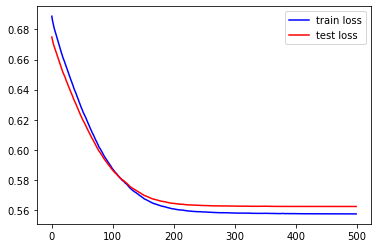

In [55]:
fig, ax = plt.subplots()
ax.plot(history.history['loss'], 'b', label='train loss')
ax.plot(history.history['val_loss'], 'r', label='test loss')
ax.legend()

w param: 
 <tf.Variable 'dense_4/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[-0.87622845],
       [ 0.377205  ]], dtype=float32)> 

b param: 
 <tf.Variable 'dense_4/bias:0' shape=(1,) dtype=float32, numpy=array([0.5249628], dtype=float32)>


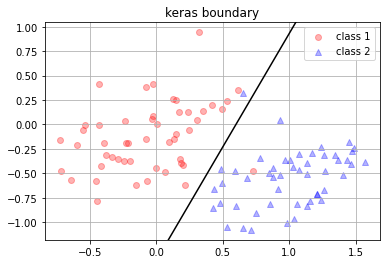

In [56]:
print('w param: \n', model.weights[0], '\n\nb param: \n', model.weights[1])

draw_state(model.weights[0].numpy(), -model.weights[1].numpy(), data1, data2, 'keras boundary')


In [57]:
import tensorflow as tf

In [58]:
x = tf.Variable(tf.constant([[2],[3]], dtype='float'))
w = tf.Variable(tf.constant([[0],[0]], dtype='float'))
with tf.GradientTape() as tape:
    f = tf.matmul(tf.transpose(w), x)

df_dw = tape.gradient(f, w)
print('derivative=', df_dw.numpy().T, '\nx=', x.numpy().T)

derivative= [[2. 3.]] 
x= [[2. 3.]]


In [59]:
# gradient of outputs

x = np.array([[1,0]])
with tf.GradientTape() as tape:
    model = Sequential([
        Dense(units=1, activation='sigmoid')
    ])
    fx = model(x)

df_dw = tape.gradient(fx, model.weights)   # Derivative of (f at x) w.r.t. weights at the current weights
print('f=', f)
print('\ndf/dw=\n', df_dw[0].numpy(), ' for w,\nand\n', df_dw[1].numpy(), 'for b')

f= tf.Tensor([[0.]], shape=(1, 1), dtype=float32)

df/dw=
 [[0.24494778]
 [0.        ]]  for w,
and
 [0.24494778] for b


In [60]:
# gradient of losses
# gradient for trainable_variables

layer = tf.keras.layers.Dense(units=1, activation='sigmoid')
x = x_train

with tf.GradientTape() as tape:
    # Forward pass
    y = layer(x)   # weights are initialized here
    loss = tf.reduce_mean((tf.transpose(y) - y_train)**2 )
    # Calculate gradients with respect to every trainable variable
    grad = tape.gradient(loss, layer.trainable_variables)

print('loss:', loss)
print('\ngrad for w:\n', grad[0]) # for w and b separately
print('\ngrad for b:\n', grad[1]) # for w and b separately

loss: tf.Tensor(0.26597852, shape=(), dtype=float32)

grad for w:
 tf.Tensor(
[[ 0.12907043]
 [-0.06927307]], shape=(2, 1), dtype=float32)

grad for b:
 tf.Tensor([0.02079738], shape=(1,), dtype=float32)


In [61]:
# Logistic regression learning

def tf_get_loss(labels, fs):
    loss_val = -1*tf.math.reduce_sum(labels*tf.math.log(fs) + (1 - labels)*tf.math.log(1 - fs))
    return loss_val

layer = tf.keras.layers.Dense(units=1, activation='sigmoid')
n_iteration = 500
step_size = 0.001
reg_const = 0.05
for iiter in range(n_iteration):
    with tf.GradientTape() as tape:
        ys = layer(x_train)   # weights are initialized at first call
        loss = tf_get_loss(y_train, tf.transpose(ys)[0])

    # Calculate gradients with respect to every trainable variable
    grad = tape.gradient(loss, layer.trainable_variables)
    if iiter == 0:
        print('weights at start:\nw:\n', layer.weights[0].numpy(), '\nb:\n', layer.weights[1].numpy(), '\n')

    # Update the weights in our linear layer.
    layer.weights[0].assign(layer.weights[0] - step_size*grad[0] - reg_const*layer.weights[0])
    layer.weights[1].assign(layer.weights[1] - step_size*grad[1])
    if iiter % 100 == 0:
        print('loss:', loss.numpy())

print('\nweights at finish:\nw:\n', layer.weights[0].numpy(),'\nb:\n', layer.weights[1].numpy())

weights at start:
w:
 [[ 0.42674363]
 [-0.34453428]] 
b:
 [0.] 

loss: 86.829216
loss: 57.434578
loss: 56.982803
loss: 56.92972
loss: 56.922874

weights at finish:
w:
 [[-0.4391218 ]
 [ 0.17997426]] 
b:
 [0.2678928]


w param: 
 [[-0.4391218 ]
 [ 0.17997426]] 

b param: 
 [0.2678928]


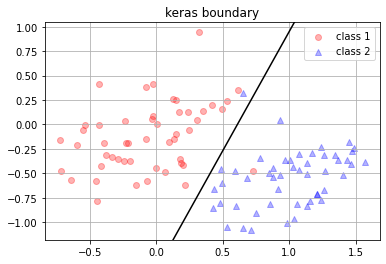

In [63]:
print('w param: \n', layer.weights[0].numpy(), '\n\nb param: \n', layer.weights[1].numpy())

draw_state(layer.weights[0].numpy(), -layer.weights[1].numpy(), data1, data2, 'keras boundary')